In [1]:
from fsds_100719.imports import *

fsds_1007219  v0.6.6 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [86]:
import glob, os, sys
folder = '../datasets/national-health-and-nutrition-examination-survey/'
os.listdir(folder) #'../datasets/national-health-and-nutrition-examination-survey/')

['medications.csv',
 'diet.csv',
 'examination.csv',
 'demographic.csv',
 'labs.csv',
 'questionnaire.csv']

In [88]:
files = glob.glob(folder+'*',recursive=True)
files

['../datasets/national-health-and-nutrition-examination-survey/',
 '../datasets/national-health-and-nutrition-examination-survey/medications.csv',
 '../datasets/national-health-and-nutrition-examination-survey/diet.csv',
 '../datasets/national-health-and-nutrition-examination-survey/examination.csv',
 '../datasets/national-health-and-nutrition-examination-survey/demographic.csv',
 '../datasets/national-health-and-nutrition-examination-survey/labs.csv',
 '../datasets/national-health-and-nutrition-examination-survey/questionnaire.csv']

In [6]:
# # Imports
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# %config InlineBackend.figure_format='retina'
# # Load in the data
# df = pd.read_csv('2013_2014_cleaned.csv')
# # Standardize the data to have a mean of ~0 and a variance of 1
# X_std = StandardScaler().fit_transform(df)
# # Create a PCA instance: pca
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X_std)
# # Plot the explained variances
# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
# # Save components to a DataFrame
# PCA_components = pd.DataFrame(principalComponents)

In [7]:
list_dfs = [pd.read_csv(os.path.abspath(file)) for file in files[1:]]
# df = pd.read_csv(os.path.abspath(files[1]))

In [8]:
df = pd.concat(list_dfs,axis=1)

In [9]:
df

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557.0,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558.0,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559.0,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560.0,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561.0,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,135.0,NaN,195.0,42.0,NaN,NaN,NaN
10173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline

In [11]:
cat_cols = df.select_dtypes('O').columns
cat_cols

Index(['OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC', 'OHX06CTC', 'OHX07CTC',
       'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 'OHX13CTC',
       'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 'OHX20CTC', 'OHX21CTC',
       'OHX22CTC', 'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC', 'OHX27CTC',
       'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC', 'CSXTSEQ', 'SMDUPCA',
       'SMD100BR'],
      dtype='object')

In [12]:
encoders = {}

for col in cat_cols:
    try:
        encoders[col] = LabelEncoder()
        df[col] = encoders[col].fit_transform(df[col].fillna('missing'))
    except:
        print(f"Error with column {col}")
    
df[cat_cols]

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,...,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,CSXTSEQ,SMDUPCA,SMD100BR
0,3,3,5,5,5,5,5,5,5,5,...,4,5,5,5,5,3,3,1,208,130
1,10,1,8,8,8,8,8,8,8,8,...,7,8,8,12,8,0,0,0,208,130
2,10,11,11,8,8,8,8,13,8,8,...,7,8,8,8,12,10,0,0,208,130
3,7,6,0,3,9,8,8,8,8,9,...,7,8,9,0,0,6,8,2,208,130
4,0,11,1,13,12,13,7,7,12,12,...,12,8,11,1,1,0,0,0,208,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,11,12,12,14,13,14,14,14,13,13,...,13,13,12,13,13,11,11,2,208,130
10171,11,12,12,14,13,14,14,14,13,13,...,13,13,12,13,13,11,11,2,208,130
10172,11,12,12,14,13,14,14,14,13,13,...,13,13,12,13,13,11,11,2,208,130
10173,11,12,12,14,13,14,14,14,13,13,...,13,13,12,13,13,11,11,2,208,130


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
pipe = Pipeline([('imp',SimpleImputer(strategy='most_frequent',verbose=1)),
                 ('sca',StandardScaler())])
#                 ('pca',PCA(n_components=20))])

pipe.fit(df)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/impute/_base.py:429: UserWarning: Deleting features without observed values: [  22  197 1288 1297 1723 1724]
  "observed values: %s" % missing)


Pipeline(memory=None,
         steps=[('imp',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=1)),
                ('sca',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [15]:
bad_cols = [df.columns[x] for x in [ 22, 197, 1288, 1297, 1723, 1724]]

In [16]:
data = pd.DataFrame(pipe.fit_transform(df), columns=df.drop(columns=bad_cols).columns)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/impute/_base.py:429: UserWarning: Deleting features without observed values: [  22  197 1288 1297 1723 1724]
  "observed values: %s" % missing)


In [17]:
data.shape

(10175, 1810)

In [18]:
data

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,-1.616296,-0.381566,-0.361972,-0.366909,0.234545,0.115522,0.345844,-0.975215,-1.292727,-0.260165,...,0.0,0.0,0.006605,-0.111513,-0.089635,0.010341,-0.052234,0.18177,-0.290139,0.129144
1,-1.615967,-0.352487,-0.367031,-0.366909,0.756411,0.115522,0.345844,-1.157019,-1.770376,-0.260165,...,0.0,0.0,-0.024187,-0.075920,-0.086340,-0.013562,-0.058845,0.18177,-0.290139,0.129144
2,-1.615637,0.809457,0.180615,-0.366909,0.234545,0.115522,0.345844,0.115613,0.617869,-0.260165,...,0.0,0.0,-0.085773,-0.118631,-0.088537,-0.039854,-0.057058,0.18177,-0.290139,0.129144
3,-1.615308,3.109443,1.955635,-0.366909,0.495478,0.115522,0.345844,0.388320,-0.815078,-0.260165,...,0.0,0.0,-0.106302,-0.147105,-0.092930,-0.097220,-0.056165,0.18177,2.783431,3.642620
4,-1.614979,0.793036,0.172632,-0.366909,0.965157,0.115522,0.345844,0.115613,-1.770376,-0.260165,...,0.0,0.0,-0.116566,-0.157783,-0.091832,-0.109172,-0.052591,0.18177,-0.290139,0.129144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,-1.616296,-0.852040,-0.627099,-0.366909,0.234545,0.115522,0.345844,0.297418,0.617869,-0.260165,...,0.0,0.0,-0.106302,-0.147105,-0.092930,-0.133074,-0.058666,0.18177,-0.290139,0.129144
10171,-1.616296,-0.852040,-0.627099,-0.366909,0.234545,0.115522,0.345844,0.297418,0.617869,-0.260165,...,0.0,0.0,-0.106302,-0.147105,-0.092930,-0.097220,-0.056165,0.18177,-0.290139,0.129144
10172,-1.616296,-0.852040,-0.627099,-0.366909,0.234545,0.115522,0.345844,0.297418,0.617869,-0.260165,...,0.0,0.0,-0.111434,-0.157783,-0.092930,-0.079294,-0.055807,0.18177,-0.290139,0.129144
10173,-1.616296,-0.852040,-0.627099,-0.366909,0.234545,0.115522,0.345844,0.297418,0.617869,-0.260165,...,0.0,0.0,-0.106302,-0.147105,-0.092930,-0.097220,-0.056165,0.18177,-0.290139,0.129144


In [19]:

pca = PCA(20)
principalComponents = pca.fit_transform(data)
features = [f'PC{i+1}' for i in range(20)]#range(1, pca.n_components_+1)

explained =  pd.Series(pca.explained_variance_ratio_,index=features)

PCA_components = pd.DataFrame(principalComponents,
                             columns=features)

[Text(0, 0.5, 'variance %'), Text(0.5, 0, 'PCA features')]

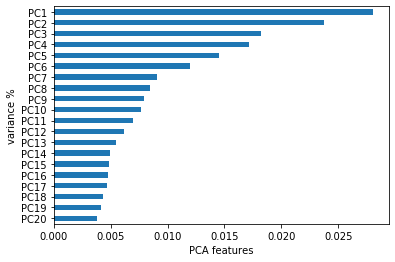

In [34]:
ax = explained.sort_values().plot(kind='barh')
ax.set(xlabel='PCA features', ylabel = 'variance %')#,xticks=features)

In [35]:
# # Plot the explained variances
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
# #Save components to a DataFrame

# # PCA_components.plot(kind='bar')

In [50]:
from ipywidgets import interact
@interact(xcol=PCA_components.columns,ycol=PCA_components.columns)
def plot_pca(xcol,ycol):
    PCA_components.plot(figsize=(10,10),kind='scatter',
                        x=xcol,y=ycol, 
                        c=sns.color_palette('RdBu', n_colors=len(PCA_components)))

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

Text(0, 0.5, 'PCA 2')

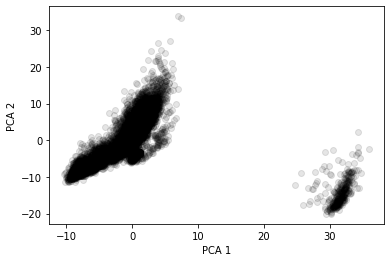

In [22]:
plt.scatter(PCA_components['PC1'], PCA_components['PC2'], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
# import plotly.express as px

In [58]:
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
from mpl_toolkits import mplot3d
pca_cols = PCA_components.columns

@interact
def plot_3d(xcol=pca_cols,ycol=pca_cols, zcol=pca_cols):
    
    ax = plt.axes(projection='3d')
    fig = ax.get_figure()
    fig.set_size_inches(15,15)

    ax.scatter3D(PCA_components[xcol],PCA_components[ycol],PCA_components[zcol],cmap='blues',alpha=0.2,s=2)
    ax.legend()
#     ax.set(xlabel=)


interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

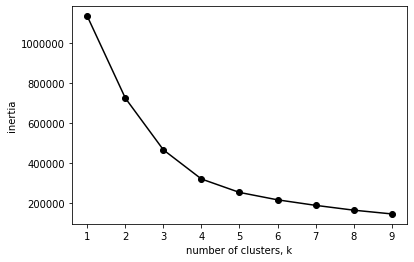

In [59]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [60]:
model = KMeans(4)

model.fit(PCA_components)

preds = model.predict(PCA_components)

preds

In [64]:
PCA_components['cluster'] = preds

In [96]:
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
from mpl_toolkits import mplot3d
pca_cols = PCA_components.columns

@interact(xcol=pca_cols,ycol=pca_cols, zcol=pca_cols)
def plot_3d(xcol=pca_cols,ycol=pca_cols[1], zcol=pca_cols[2],K=(0,10)):
    
    model = KMeans(K)

    model.fit(PCA_components)

    preds = model.predict(PCA_components)

    ax = plt.axes(projection='3d')
    fig = ax.get_figure()
    fig.set_size_inches(10,10)

    ax.scatter3D(PCA_components[xcol],PCA_components[ycol],PCA_components[zcol],alpha=0.2,s=2,c=preds)
    ax.legend()
#     ax.set(xlabel=)

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

In [81]:
PCA_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,cluster
0,-0.501655,3.663932,6.265024,-1.991332,-6.621898,11.160584,-2.361520,0.644971,-2.689253,1.170626,...,0.719250,-4.282785,2.712435,0.094039,-1.174297,-1.696127,0.457396,0.253864,2.704791,3
1,2.214571,13.807849,4.583398,-4.521593,13.808433,2.817567,-3.155258,-5.377357,4.697344,0.116012,...,-1.540537,-7.549652,-1.924857,-2.060301,2.305096,0.920150,2.203902,-0.028338,8.536894,3
2,1.901226,4.316216,5.271904,-1.062094,-2.456310,-0.651203,0.391077,-0.243821,-5.822783,0.986808,...,-0.285983,-2.416681,0.748301,-2.378444,0.841196,-0.289031,-0.168284,-1.454169,-4.205921,3
3,-4.355394,-4.080608,-5.162117,0.541055,2.127470,0.152574,4.944576,0.504777,-0.985766,0.237115,...,-3.428587,1.693410,-2.508202,-0.073094,-1.018967,-1.025982,-2.052799,-0.769552,0.265867,0
4,0.325986,3.284851,8.821094,-1.954456,-4.136349,6.161867,-1.333465,2.183087,-4.361442,0.203210,...,-5.022925,-0.880691,-0.500044,-1.697789,-1.371390,-0.850575,3.383380,2.297337,-2.743917,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,0.965944,-3.423690,-1.456412,0.094618,-5.476466,-7.369826,-1.364718,-2.835447,-2.256119,1.040985,...,-0.358033,-4.129316,0.872129,2.886992,1.145389,0.935513,0.733781,0.858995,0.352364,2
10171,1.067705,-3.343154,-4.019527,0.057626,-5.541158,-7.095223,-0.614279,1.785423,-1.937645,1.190856,...,-0.404430,-4.249447,-2.286378,0.006240,1.515944,-2.866261,-0.311185,1.411601,0.379904,2
10172,0.976793,-3.432128,-1.551467,0.068427,-5.442654,-7.184973,-0.825551,-0.804956,-3.027020,1.037349,...,-0.336454,-4.003591,-0.680560,0.334658,0.776429,0.031022,0.496987,1.037114,-0.081805,2
10173,1.101145,-3.417922,-4.494360,0.110448,-5.601417,-7.105677,-0.574656,2.726210,-0.021513,1.006790,...,-0.478108,-4.316360,-1.132453,-0.447633,0.951343,-1.570378,0.053476,0.889475,0.246523,2


In [85]:
@interact(xcol=pca_cols,ycol=pca_cols, zcol=pca_cols)
def plotly_clusters(xcol='PC1',ycol='PC2',zcol='PC3'):
    fig = px.scatter_3d(PCA_components,x=xcol,y=ycol, z=zcol,color='cluster')
    fig.update_traces(marker=dict(size=2))
    return fig 

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

In [79]:
plotly_clusters()

In [ ]:
}